In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import normaltest
from scipy import stats
from scipy.stats import shapiro

pd.set_option('display.max_rows', 50) # show more rows
pd.set_option('display.max_columns', 50) # show more columns

stud_orig = pd.read_csv('stud_math.csv')

# Dataset information

In [2]:
# Dataset for changes:
stud = stud_orig

In [3]:
# Rows information:
display(stud.head(10))

,school,gender,age,address,famsize,pstatus,medu,fedu,mprof,fprof,reason,custodian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
# Columns information:
stud.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   gender               395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   pstatus              350 non-null    object 
 6   medu                 392 non-null    float64
 7   fedu                 371 non-null    float64
 8   mprof                376 non-null    object 
 9   fprof                359 non-null    object 
 10  reason               378 non-null    object 
 11  custodian            364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# Initial data processing and initial data validations

In [5]:
# Rename the column 'studytime, granular':
stud.rename(columns={'studytime, granular': 'studytime_granular',}, inplace=True)

In [6]:
# Show the columns names:
stud.columns

Index(['school', 'gender', 'age', 'address', 'famsize', 'pstatus', 'medu',
       'fedu', 'mprof', 'fprof', 'reason', 'custodian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'studytime_granular', 'higher', 'internet', 'romantic',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [7]:
# Function for viewing data in a column:
def review_col_info(df, col, is_num=False, is_head=False):
    # unique values and number of rows for each of them:
    display_info = pd.DataFrame(df[col].value_counts())
    if is_head:
        display(display_info.head(10))
    else:
        display(display_info)
    # number of unique values in a column:
    cnt_uniq = df[col].nunique()
    print('Column {cl}: found {cnt} unique values'.format(cl = col, cnt = cnt_uniq))
    # the number of empty values in the column:
    cnt_null = len(df[pd.isnull(df[col]) == True][col])
    print('Column {cl}: found {cnt} null values'.format(cl = col, cnt = cnt_null))
    if is_num:
        # Finding the minimum, average, maximum, deviation, quantity, quantiles:
        display(stud[col].describe())

        
# Function to check if values match a list of values - for columns yes/no, F/M, etc.:
def check_enum(df, col, values_list):
    if None not in values_list:
        values_list.append(None)
    error_list = []
    for x in df[col]:
        if x not in values_list:
            if x not in error_list:
                error_list.append(x)
    if error_list:
        print('Column {cl}: found incorrect values {er_lst} that do not match the list {cr_lst}'
              .format(cl = col, er_lst = error_list, cr_lst = values_list))
    else:
        print('Column {cl}: all values are correct and match the list {cr_lst}'.format(cl = col, cr_lst = values_list))

        
# Function to replace "" to None:
def replace_to_none(df, col):
    df[col] = df[col].apply(lambda x: None if (pd.isnull(x) or x.lower() == 'nan') else x)       

    
# Function to add a column to the list to remove:
drop_list = []
def drop(col):
    if col not in drop_list:
        drop_list.append(col)

        
# Function to get outliers by column:
def get_outlier(df, col):
    Q3 = pd.DataFrame.quantile(df, q=0.75, axis=0, numeric_only=True, interpolation='midpoint')[col]
    Q1 = pd.DataFrame.quantile(df, q=0.25, axis=0, numeric_only=True, interpolation='midpoint')[col]
    IQR = round(Q3-Q1,1)
    return df[~df[col].between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)][col]


# Function to calculate pairwise p_value with multiple column value.
# Can be called with one of 2 options: 
# using scipy.stats.ttest_ind - calculate the Student's T-test for the means of two independent samples of scores.
# using scipy.stats.mannwhitneyu - perform the Mann-Whitney U rank test on two independent samples.
def get_stat_dif(df, col, col_num, gauss):
    
    p_list =[]
    res = '' 
    
    cols = df.loc[:, col].value_counts().index
    combinations_all = list(combinations(cols, 2))
    conv = 0.05 / len(combinations_all) # threshold significance level with Bonferroni correction
    
    for comb in combinations_all:
        if gauss:
            p_value = ttest_ind(df.loc[df.loc[:, col] == comb[0], col_num], 
                     df.loc[df.loc[:, col] == comb[1], col_num]).pvalue
        else:
            p_value = stats.mannwhitneyu(df.loc[df.loc[:, col] == comb[0], col_num],
                     df.loc[df.loc[:, col] == comb[1], col_num]).pvalue
        
        p_list.append(p_value)
        
        if p_value < conv:
            res = ' there is significance: for ' + str(comb) + ' p_value = ' + str(p_value)
            break
            
    if res == '':
        res = ' no significance: min(p_value) = ' + str(min(p_list))
    
    if gauss:
        res = 'For threshold ' + str(conv) + ' by Student\'s criterion' + res
    else:
        res = 'For threshold ' + str(conv) + ' by Mann-Whitney\'s criterion' + res
    
    return res

In [8]:
# List of string columns:
str_col_list = ['school', 'gender', 'address', 'famsize', 'pstatus', 'mprof', 'fprof', 'reason', 'custodian', 'schoolsup', 
                'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [9]:
# Replacing empty values with None in string columns:
for col in str_col_list:
    replace_to_none(stud, col)

In [10]:
# Checking whether the data in the string tables matches the list of values:

# Check gender column values:
values_list = ['F', 'M']
check_enum(stud, 'gender', values_list)

# Check address column values:
values_list = ['U', 'R']
check_enum(stud, 'address', values_list)

# Check famsize column values:
values_list = ['LE3', 'GT3']
check_enum(stud, 'famsize', values_list)

# Check pstatus column values:
values_list = ['T', 'A']
check_enum(stud, 'pstatus', values_list)

# Check mprof and fprof columns values:
columns = ['mprof', 'fprof']
values_list = ['teacher', 'health', 'services', 'at_home', 'other']
for column in columns:
    check_enum(stud, column, values_list)
    
# Check reason column values:
values_list = ['home', 'reputation', 'course', 'other']
check_enum(stud, 'reason', values_list)

# Check custodian column values:
values_list = ['mother', 'father', 'other']
check_enum(stud, 'custodian', values_list)

# Check columns with 'yes' or 'no' values:
columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
values_list = ['yes', 'no']
for column in columns:
    check_enum(stud, column, values_list)

Column gender: all values are correct and match the list ['F', 'M', None]
Column address: all values are correct and match the list ['U', 'R', None]
Column famsize: all values are correct and match the list ['LE3', 'GT3', None]
Column pstatus: all values are correct and match the list ['T', 'A', None]
Column mprof: all values are correct and match the list ['teacher', 'health', 'services', 'at_home', 'other', None]
Column fprof: all values are correct and match the list ['teacher', 'health', 'services', 'at_home', 'other', None]
Column reason: all values are correct and match the list ['home', 'reputation', 'course', 'other', None]
Column custodian: all values are correct and match the list ['mother', 'father', 'other', None]
Column schoolsup: all values are correct and match the list ['yes', 'no', None]
Column famsup: all values are correct and match the list ['yes', 'no', None]
Column paid: all values are correct and match the list ['yes', 'no', None]
Column activities: all values ar

Primary validation and conversion completed. All values are correct. Next, each column will be analyzed separately.

# Analysis of the 'score' column
Scores on the state exam in mathematics.

In [11]:
# Score is the main object of research, it must be analyzed first:
review_col_info(stud, 'score', True)

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
45.0,27
70.0,27
80.0,16


Column score: found 18 unique values
Column score: found 6 null values


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [12]:
# Remove the rows with empty ratings from the working dataset, because they are not informative:
stud = stud[~pd.isnull(stud.score)]

<AxesSubplot:>

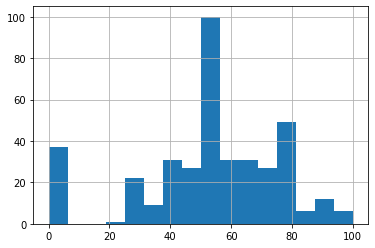

In [13]:
# Distribution histogram of scores:
stud.score.hist(bins=16)

The scores are distributed more or less normally, except for zero scores.

In [14]:
# Exclude zero scores from the working dataset, because they are not included in the normal distribution:
stud = stud[stud.score > 0]

In [15]:
# Check outliers:
outliers = get_outlier(stud, 'score')
print('Count of outliers: {}'.format(outliers.count()))
display(outliers)

Count of outliers: 0


Series([], Name: score, dtype: float64)

There are no outliers.

Check for the normality of the distribution with the assumption of 0.05.<br>
For tests used methods:<br>
scipy.stats.shapiro - the Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.<br>
scipy.stats.normaltest - this function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.

In [16]:
# Set the assumption of 0.05:
alpha = 0.05

# shapiro test:
u, p_value = shapiro(stud.score)
print('shapiro p_value=', p_value)
if p_value > alpha:
    print('By shapiro: distribution is normal')
else:
    print('By shapiro: distribution is not normal')

# normaltest:
u, p_value = normaltest(stud.score)
print('normaltest p_value=', p_value)
if p_value > alpha:
    print('By normaltest: distribution is normal')
else:
    print('By normaltest: distribution is not normal')

shapiro p_value= 0.0001710323995212093
By shapiro: distribution is not normal
normaltest p_value= 0.051812401238085656
By normaltest: distribution is normal


The distribution is almost normal. Most likely, zero scores are lost data.

# Correlation of numeric columns

In [17]:
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.122979,-0.121617,0.095370,-0.011426,0.235875,0.011426,0.074152,0.004837,0.123638,-0.056173,0.112599,-0.131542
medu,-0.122979,1.000000,0.247339,-0.165394,0.070533,-0.205944,-0.070533,-0.000958,0.021002,0.080556,-0.038050,-0.027377,0.186477
fedu,-0.121617,0.247339,1.000000,0.042074,0.049060,-0.141995,-0.049060,0.049613,-0.071328,-0.026507,0.025874,0.000245,0.069842
traveltime,0.095370,-0.165394,0.042074,1.000000,-0.101490,0.091757,0.101490,-0.023920,-0.023067,0.029374,-0.000092,-0.047560,-0.075516
studytime,-0.011426,0.070533,0.049060,-0.101490,1.000000,-0.156406,-1.000000,0.063856,-0.128661,-0.029686,-0.085469,-0.030187,0.142055
failures,0.235875,-0.205944,-0.141995,0.091757,-0.156406,1.000000,0.156406,-0.011414,0.127391,0.126770,0.064083,0.089541,-0.289377
studytime_granular,0.011426,-0.070533,-0.049060,0.101490,-1.000000,0.156406,1.000000,-0.063856,0.128661,0.029686,0.085469,0.030187,-0.142055
famrel,0.074152,-0.000958,0.049613,-0.023920,0.063856,-0.011414,-0.063856,1.000000,0.162283,0.050751,0.096471,-0.089609,0.046717
freetime,0.004837,0.021002,-0.071328,-0.023067,-0.128661,0.127391,0.128661,0.162283,1.000000,0.296392,0.072729,0.007748,-0.012457
goout,0.123638,0.080556,-0.026507,0.029374,-0.029686,0.126770,0.029686,0.050751,0.296392,1.000000,-0.010343,-0.050616,-0.182286


Column studytime is fully correlated with studytime_granular, one of the columns can be removed.<br>
The correlation of the other columns is rather weak and does not exceed 0.3.

In [18]:
# Remove studytime_granular:
drop('studytime_granular')

In [19]:
# Check the correlation of non-empty column values:
for col in stud.columns:
    stud_tmp = stud[~stud[col].isnull()]
stud_tmp.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.122979,-0.121617,0.095370,-0.011426,0.235875,0.011426,0.074152,0.004837,0.123638,-0.056173,0.112599,-0.131542
medu,-0.122979,1.000000,0.247339,-0.165394,0.070533,-0.205944,-0.070533,-0.000958,0.021002,0.080556,-0.038050,-0.027377,0.186477
fedu,-0.121617,0.247339,1.000000,0.042074,0.049060,-0.141995,-0.049060,0.049613,-0.071328,-0.026507,0.025874,0.000245,0.069842
traveltime,0.095370,-0.165394,0.042074,1.000000,-0.101490,0.091757,0.101490,-0.023920,-0.023067,0.029374,-0.000092,-0.047560,-0.075516
studytime,-0.011426,0.070533,0.049060,-0.101490,1.000000,-0.156406,-1.000000,0.063856,-0.128661,-0.029686,-0.085469,-0.030187,0.142055
failures,0.235875,-0.205944,-0.141995,0.091757,-0.156406,1.000000,0.156406,-0.011414,0.127391,0.126770,0.064083,0.089541,-0.289377
studytime_granular,0.011426,-0.070533,-0.049060,0.101490,-1.000000,0.156406,1.000000,-0.063856,0.128661,0.029686,0.085469,0.030187,-0.142055
famrel,0.074152,-0.000958,0.049613,-0.023920,0.063856,-0.011414,-0.063856,1.000000,0.162283,0.050751,0.096471,-0.089609,0.046717
freetime,0.004837,0.021002,-0.071328,-0.023067,-0.128661,0.127391,0.128661,0.162283,1.000000,0.296392,0.072729,0.007748,-0.012457
goout,0.123638,0.080556,-0.026507,0.029374,-0.029686,0.126770,0.029686,0.050751,0.296392,1.000000,-0.010343,-0.050616,-0.182286


A significant correlation appeared between the Medu and Fedu columns. Need to check correlation after clearing data in these columns.

# Analysis of numeric columns

The null hypothesis for each column is that the value of the column does not affect the values in the score column.<br>
The hypothesis must be confirmed or refuted graphically or analytically.<br>
Graphically - plotting: distribution histogram, boxplot, a plot of the average of the ratings for each value in case the data is discrete.<br>
Analytically - correlation testing in the ways of Pearson, Spearman and Kendall.<br>
scipy.stats.pearsonr - Pearson correlation coefficient and p-value for testing non-correlation.<br>
scipy.stats.spearmanr - Calculate a Spearman correlation coefficient with associated p-value.<br>
scipy.stats.kendalltau - Calculate Kendall’s tau, a correlation measure for ordinal data.<br>
Spearman and Kendall correlations are better suited to scaling than Pearson.<br>
To verify the dependence of the values, the hypothesis of independence must be tested by calculating p_value.<br>
If p_value is greater than the significance level (take it = 0.05), then the null hypothesis is confirmed.

## 'age' column
Student's age (from 15 to 22).

In [20]:
# Previously found a correlation between age and score.
review_col_info(stud, 'age', True)

,age
16,96
17,90
15,76
18,69
19,16
20,3
22,1
21,1


Column age: found 8 unique values
Column age: found 0 null values


count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

There are no empty values.

<AxesSubplot:>

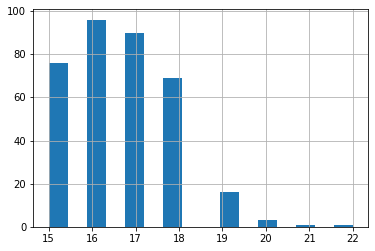

In [21]:
# Distribution histogram:
stud.age.hist(bins=16)

The distribution is similar to normal up to 18 years of age. 

In [22]:
# Check the outliers:
outliers = get_outlier(stud, 'age')
print('Count of outliers: {}'.format(outliers.count()))
display(outliers)

Count of outliers: 1


247    22
Name: age, dtype: int64

In [23]:
# Remove the outlier for age = 22 years, create a temporary dataset:
stud_tmp = stud[stud.age < 22]

In [24]:
# Check the distribution for normality by normaltest:
alpha = 0.05
u, p_value = normaltest(stud_tmp.age)
print('normaltest p_value=', p_value)
if p_value > alpha:
    print('By normaltest: distribution is normal')
else:
    print('By normaltest: distribution is not normal')

normaltest p_value= 0.002862442153038958
By normaltest: distribution is not normal


<AxesSubplot:title={'center':'score'}, xlabel='age'>

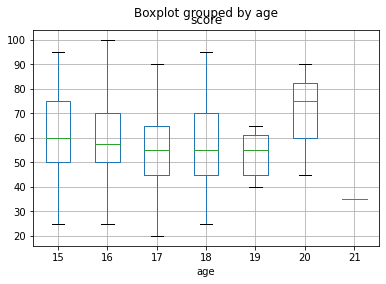

In [25]:
# Create a boxplot to look at the range of scores for each age:
stud_tmp.boxplot(column = 'score', by = 'age')

Up to 19 years of age, there is a slight decrease in scores with age.<br>
There are only 3 students in the 20-year-old group, and 1 in the 21-year-old group. This group can be ignored, because there is not enough data for analysis.

<AxesSubplot:xlabel='age'>

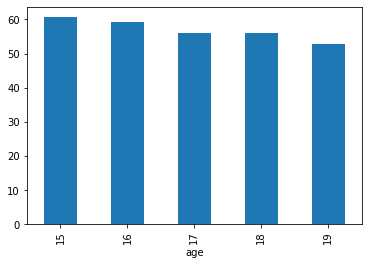

In [26]:
# Average scores for each age under 19:
stud_tmp[stud_tmp.age <= 19].groupby(['age']).score.mean().plot(kind='bar')

The plot also shows that with age, the scores slightly decrease.

In [27]:
# To verify the dependences between the columns, test the independence hypothesis in different ways by calculating p_value:
print('Pearson p_value =',pearsonr(stud_tmp.age, stud_tmp.score)[1])
print('Spearman p_value =',spearmanr(stud_tmp.age, stud_tmp.score)[1])
print('Kendall p_value =',kendalltau(stud_tmp.age, stud_tmp.score)[1])
# Correlation:
pd.DataFrame(stud_tmp.age, stud_tmp.score).reset_index().corr()

Pearson p_value = 0.022719301282731686
Spearman p_value = 0.012318658221349036
Kendall p_value = 0.011698652404360908


,score,age
score,1.000000,-0.100412
age,-0.100412,1.000000


Since p_value < 0.05, the null hypothesis is rejected and the alternative hypothesis that there is a relationship between the values is accepted. The column age must be included in the future model.

## 'medu' column
Mother's education (0 - no, 1 - 4 grades, 2 - 5-9 grades, 3 - secondary special or 11 grades, 4 - higher).

In [28]:
# Previously a correlation between medu and score was found.
review_col_info(stud, 'medu', True)

,medu
4.0,125
2.0,88
3.0,87
1.0,47
0.0,3


Column medu: found 5 unique values
Column medu: found 2 null values


count    350.000000
mean       2.811429
std        1.091192
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

In [29]:
# Remove empty lines, create temporary dataset:
stud_tmp = stud[~stud['medu'].isnull()]

In [30]:
# Check the outliers:
outliers = get_outlier(stud_tmp, 'medu')
print('Count of outliers: {}'.format(outliers.count()))
display(outliers)

Count of outliers: 0


Series([], Name: medu, dtype: float64)

<AxesSubplot:title={'center':'score'}, xlabel='medu'>

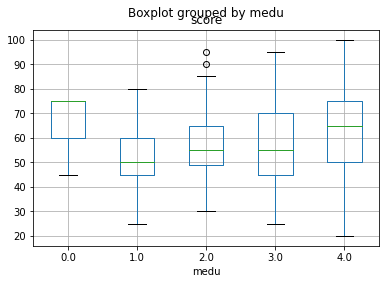

In [31]:
# Create a boxplot to look at the scores for each group:
stud_tmp.boxplot(column = 'score', by = 'medu')

In [32]:
# Review the data for the medu value = 0:
stud_tmp[stud_tmp.medu == 0]

,school,gender,age,address,famsize,pstatus,medu,fedu,mprof,fprof,reason,custodian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
127,GP,F,19,U,GT3,T,0.0,1.0,at_home,other,course,other,1.0,2.0,3.0,no,None,no,no,no,-6.0,no,no,no,3.0,4.0,2.0,5.0,2.0,45.0
249,GP,M,16,U,GT3,T,0.0,2.0,other,other,other,mother,1.0,1.0,0.0,no,no,yes,no,None,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,0.0,75.0
324,GP,F,17,U,LE3,T,0.0,2.0,at_home,at_home,home,father,2.0,3.0,0.0,no,no,no,no,yes,-9.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,75.0


There are 3 rows only with medu = 0. The data are similar to erroneous, most likely, the education of the mother is not indicated.

In [33]:
# Remove zero values from the temporary dataset:
stud_tmp = stud_tmp[stud_tmp.medu > 0]

In [34]:
# Remove outliers for medu = 2 from the temp dataset:
stud_tmp = stud_tmp[~((stud_tmp.medu == 2) & (stud_tmp.score >= 90))]

<AxesSubplot:xlabel='medu'>

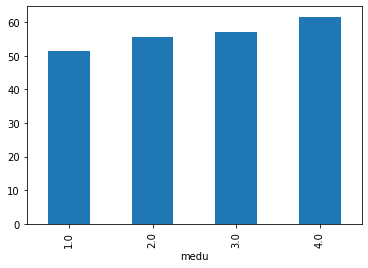

In [35]:
# Review the average scores for each medu value:
stud_tmp.groupby(['medu']).score.mean().plot(kind='bar')

In [36]:
# The plot shows the dependence of score on Medu. Look at the correlation after data processing:
pd.DataFrame(stud_tmp.medu, stud_tmp.score).reset_index().corr()

,score,medu
score,1.000000,0.215908
medu,0.215908,1.000000


There is a slight correlation. Test the null hypothesis that there is no relationship between the columns.

In [37]:
# Check the dependence analytically according to Spearman (because this is a scale interval):
print('Spearman p_value =',spearmanr(stud_tmp.medu, stud_tmp.score)[1])

Spearman p_value = 9.23848694032104e-05


Since p_value < 0.05, the null hypothesis is rejected and the alternative hypothesis that there is a relationship between the values is accepted. The medu column should be included in the future model.

## 'fedu' column
Father's education (0 - no, 1 - 4 grades, 2 - 5-9 grades, 3 - secondary special or 11 grades, 4 - higher).

In [38]:
review_col_info(stud, 'fedu', True)

,fedu
2.0,94
3.0,89
4.0,80
1.0,65
0.0,2
40.0,1


Column fedu: found 6 unique values
Column fedu: found 21 null values


count    331.000000
mean       2.658610
std        2.324066
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

In [39]:
# The obviously incorrect value = 40 is detected. Create a temporary dataset without fedu = 40 and without empty values:
stud_tmp = stud[stud.fedu < 40]

In [40]:
# Check the outliers:
outliers = get_outlier(stud_tmp, 'fedu')
print('Count of outliers: {}'.format(outliers.count()))
display(outliers)

Count of outliers: 2


76     0.0
171    0.0
Name: fedu, dtype: float64

In [41]:
# Remove outliers (rows with fedu = 0) from the temp dataset:
stud_tmp = stud_tmp[stud_tmp.fedu > 0]

<AxesSubplot:title={'center':'score'}, xlabel='fedu'>

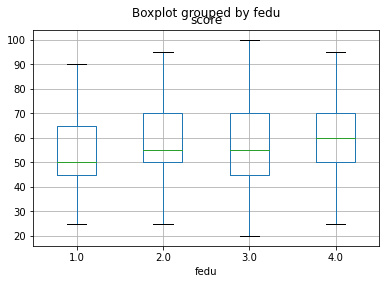

In [42]:
# Create a boxplot
stud_tmp.boxplot(column = 'score', by = 'fedu')

<AxesSubplot:xlabel='fedu'>

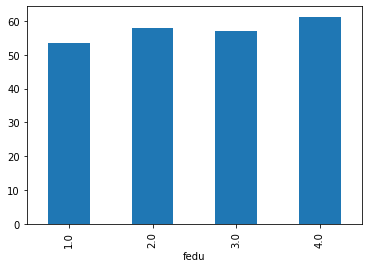

In [43]:
# Review the average scores for each Fedu value:
stud_tmp.groupby(['fedu']).score.mean().plot(kind='bar')

A very slight dependence of the level of education of the father on the scores of the child is visible.

In [44]:
# Check the dependence analytically according to Spearman (because this is a scale interval):
print('Spearman p_value =',spearmanr(stud_tmp.fedu, stud_tmp.score)[1])

Spearman p_value = 0.006319095740639738


Since p_value < 0.05, the null hypothesis is rejected and the alternative hypothesis that there is a relationship between the values is accepted.<br>
But a significant correlation was previously found between the medu and fedu columns. Correlate the cleared values.

In [45]:
# Removal of outliers and incorrect values for medu, performed earlier for a temporary dataset:
stud_tmp = stud_tmp[stud_tmp.medu > 0]
stud_tmp = stud_tmp[~((stud_tmp.medu == 2) & (stud_tmp.score >= 90))]
# Correlation between columns medu and fedu in the updated temp dataset:
pd.DataFrame(stud_tmp.medu, stud_tmp.fedu).reset_index().corr()

,fedu,medu
fedu,1.000000,0.756799
medu,0.756799,1.000000


The correlation is high enough to allow only one column to be included in the model.

In [46]:
# Remove the column fedu from the future model:
drop('fedu')

## 'traveltime' column
Travel time to school (1 - <15 min., 2 - 15-30 min., 3 - 30-60 min., 4 - >60 min).

In [47]:
review_col_info(stud, 'traveltime', True)

,traveltime
1.0,219
2.0,86
3.0,17
4.0,7


Column traveltime: found 4 unique values
Column traveltime: found 23 null values


count    329.000000
mean       1.428571
std        0.690907
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [48]:
# Remove empty values, create a temporary dataset without these values:
stud_tmp = stud[~stud['traveltime'].isnull()]

In [49]:
# Check the outliers:
outliers = get_outlier(stud_tmp, 'traveltime')
print('Count of outliers: {}'.format(outliers.count()))
display(outliers)

Count of outliers: 7


61     4.0
108    4.0
149    4.0
164    4.0
228    4.0
327    4.0
375    4.0
Name: traveltime, dtype: float64

In [50]:
# All traveltime = 4 values are outliers. Remove them from the temporary dataset:
stud_tmp = stud_tmp[stud_tmp.traveltime < 4]

<AxesSubplot:title={'center':'score'}, xlabel='traveltime'>

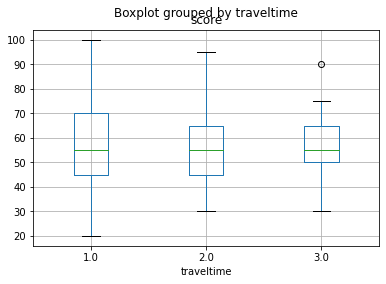

In [51]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'traveltime')

In [52]:
# There is an outlier for traveltime = 3, remove it from the temporary dataset:
stud_tmp = stud_tmp[~((stud_tmp.traveltime == 3) & (stud_tmp.score == 90))]

Boxplot shows that there is a slight dependence of scores on traveltime. It can be seen that among students who get home in less than 15 minutes, the scores are higher than among other groups.

<AxesSubplot:xlabel='traveltime'>

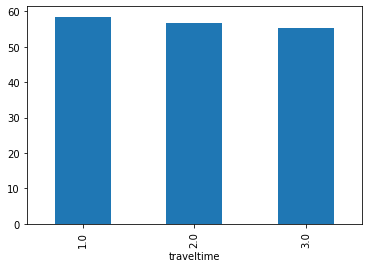

In [53]:
# Review the average scores for each traveltime value:
stud_tmp.groupby(['traveltime']).score.mean().plot(kind='bar')

On the plot of average scores for each traveltime, there is also a slight dependence: the more traveltime, the lower the scores of the student.

In [54]:
# Check the dependence of the columns analytically:
print('Pearson p_value =',pearsonr(stud_tmp.traveltime, stud_tmp.score)[1])
print('Spearman p_value =',spearmanr(stud_tmp.traveltime, stud_tmp.score)[1])
print('Kendall p_value =',kendalltau(stud_tmp.traveltime, stud_tmp.score)[1])
# Correlation:
pd.DataFrame(stud_tmp.traveltime, stud_tmp.score).reset_index().corr()

Pearson p_value = 0.2649391834923166
Spearman p_value = 0.24093598006339392
Kendall p_value = 0.24447743048158


,score,traveltime
score,1.000000,-0.183528
traveltime,-0.183528,1.000000


Since p_value > 0.05, the null hypothesis of column independence is accepted.<br>
Therefore, scores are independent of traveltime and the traveltime column should not be included to a future model.

In [55]:
# Remove the column traveltime:
drop('traveltime')

## 'studytime' column
The amount of time spent on extracurricular lessons (1 - <2 hours, 2 - 2-5 hours, 3 - 5-10 hours, 4 - >10 hours).

In [56]:
review_col_info(stud, 'studytime', True)

,studytime
2.0,173
1.0,90
3.0,58
4.0,24


Column studytime: found 4 unique values
Column studytime: found 7 null values


count    345.000000
mean       2.046377
std        0.840919
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [57]:
# Remove empty values, create a temporary dataset without these values:
stud_tmp = stud[~stud['studytime'].isnull()]

In [58]:
# Check the outliers:
outliers = get_outlier(stud_tmp, 'studytime')
print('Count of outliers: {}'.format(outliers.count()))
display(outliers)

Count of outliers: 24


47     4.0
66     4.0
67     4.0
69     4.0
70     4.0
71     4.0
76     4.0
77     4.0
94     4.0
95     4.0
105    4.0
106    4.0
108    4.0
121    4.0
204    4.0
210    4.0
256    4.0
271    4.0
282    4.0
293    4.0
298    4.0
303    4.0
330    4.0
338    4.0
Name: studytime, dtype: float64

All values of studytime = 4 are outliers. It's a lot of values, first these values should be analyzed.

<AxesSubplot:title={'center':'score'}, xlabel='studytime'>

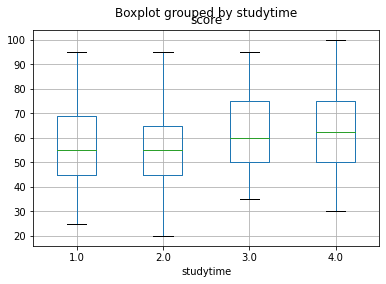

In [59]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'studytime')

The plot shows that students in group 3 learn better than 4, and 1 - better than 2. The differences between 1 and 2, as well as between 3 and 4, are small. Let's combine the values into a group by creating a new column in the working dataset.
Group 0 will include studytime = 1 and 2, group 1 will include values 3 and 4.

In [60]:
# Create a new column with grouped values of studytime:
stud['gr_studytime'] = stud.studytime.apply(lambda x: 0 if x<3 else 1)
stud_tmp = stud[~stud['studytime'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='gr_studytime'>

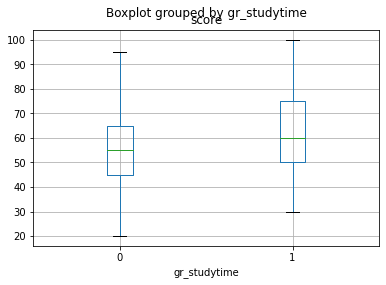

In [61]:
# Create a boxplot for the new column gr_studytime:
stud_tmp.boxplot(column = 'score', by = 'gr_studytime')

The plot clearly shows the relationship: students who study extra 5 or more hours a week study better than others.

In [62]:
# Check the dependence of the columns analytically:
print('Pearson p_value =',pearsonr(stud_tmp.gr_studytime, stud_tmp.score)[1])
print('Spearman p_value =',spearmanr(stud_tmp.gr_studytime, stud_tmp.score)[1])
print('Kendall p_value =',kendalltau(stud_tmp.gr_studytime, stud_tmp.score)[1])
# Correlation:
pd.DataFrame(stud_tmp.gr_studytime, stud_tmp.score).reset_index().corr()

Pearson p_value = 0.0005317170077041298
Spearman p_value = 0.0013449807221124514
Kendall p_value = 0.001426420948164652


,score,gr_studytime
score,1.000000,0.465512
gr_studytime,0.465512,1.000000


Since p_value < 0.05, the null hypothesis is rejected and the alternative hypothesis that there is a relationship between the values is accepted. There is also a strong correlation. The new gr_studytime column should be included in the future model.<br>
The studytime column is less informative and should be removed.

In [63]:
# Remove the studytime column from the future model:
drop('studytime')

## 'failures' column
Number of extracurricular failures (n if 1<=n<=3, otherwise 0).

In [64]:
review_col_info(stud, 'failures', True)

,failures
0.0,273
1.0,38
2.0,11
3.0,10


Column failures: found 4 unique values
Column failures: found 20 null values


count    332.000000
mean       0.271084
std        0.667779
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

It is not entirely clear what is meant by failures, and why there can be from 1 to 3.

In [65]:
# Remove empty values, create a temporary dataset without these values:
stud_tmp = stud[~stud['failures'].isnull()]

Most students do not have failures.<br> 
The distribution is far from normal.

In [66]:
# Check the outliers:
outliers = get_outlier(stud_tmp, 'failures')
print('Count of outliers: {}'.format(outliers.count()))
display(outliers)

Count of outliers: 59


2      3.0
18     3.0
25     2.0
40     1.0
44     1.0
      ... 
370    2.0
376    2.0
384    1.0
390    2.0
392    3.0
Name: failures, Length: 59, dtype: float64

Lots of outliers!

<AxesSubplot:>

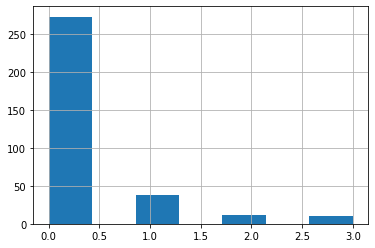

In [67]:
# Review the histogram:
stud_tmp.failures.hist(bins=7)

Due to the small number of students with failures compared to the successful ones, all failures values other than 0 were included in the outliers. Removing all outliers is incorrect, because the column will become uninformative in this case.

<AxesSubplot:title={'center':'score'}, xlabel='failures'>

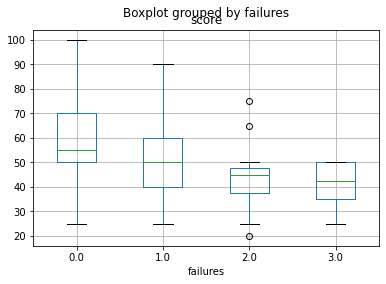

In [68]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'failures')

There is a clear inverse dependence of estimates on the number of failures.To neutralize outliers, a new column gr_failures were added, in which the value will be 0 if the student has no failures, and 1 if there are any number.

In [69]:
# Add a new column with grouped values:
stud['gr_failures'] = stud.failures.apply(lambda x: 0 if x == 0 else 1)
# Remove empty values by creating a temporary dataset:
stud_tmp = stud[~stud['gr_failures'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='gr_failures'>

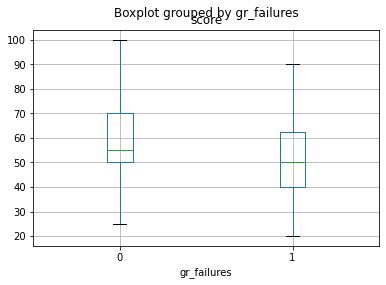

In [70]:
# Create a boxplot for the new column:
stud_tmp.boxplot(column = 'score', by = 'gr_failures')

In [71]:
# Check the dependence of the columns analytically:
print('Pearson p_value =',pearsonr(stud_tmp.gr_failures, stud_tmp.score)[1])
print('Spearman p_value =',spearmanr(stud_tmp.gr_failures, stud_tmp.score)[1])
print('Kendall p_value =',kendalltau(stud_tmp.gr_failures, stud_tmp.score)[1])
# Correlation:
pd.DataFrame(stud_tmp.gr_failures, stud_tmp.score).reset_index().corr()

Pearson p_value = 0.00010489691211505332
Spearman p_value = 4.882599013160085e-05
Kendall p_value = 5.762698581464905e-05


,score,gr_failures
score,1.00000,-0.21815
gr_failures,-0.21815,1.00000


Since p_value < 0.05, the null hypothesis is rejected and the alternative hypothesis that there is a relationship between the values is accepted. There is also a strong correlation. The new gr_failures column should be included in the future model.<br>
The failures column is less informative and should be removed.

In [72]:
# Remove the failures column fromthe future model:
drop('failures')

## 'famrel' column
Family relationships (from 1 - very bad to 5 - very good).

In [73]:
review_col_info(stud, 'famrel', True)

,famrel
4.0,163
5.0,88
3.0,56
2.0,14
1.0,6
-1.0,1


Column famrel: found 6 unique values
Column famrel: found 24 null values


count    328.000000
mean       3.942073
std        0.921871
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

In [74]:
# There is 1 incorrect value and a lot of empty values. Remove them, create a temporary dataset:
stud_tmp = stud[stud.famrel > 0]

In [75]:
# Check the outliers:
outliers = get_outlier(stud_tmp, 'famrel')
print('Count of outliers: {}'.format(outliers.count()))
display(outliers)

Count of outliers: 20


27     2.0
37     2.0
46     2.0
60     2.0
66     1.0
79     2.0
108    1.0
141    2.0
156    2.0
184    1.0
206    2.0
207    1.0
222    2.0
238    2.0
240    2.0
278    2.0
299    1.0
357    1.0
363    2.0
391    2.0
Name: famrel, dtype: float64

Lots of outliers!

<AxesSubplot:>

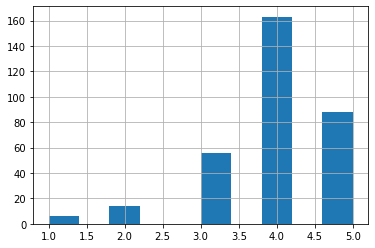

In [76]:
# Review the histogram:
stud_tmp.famrel.hist(bins=10)

In [77]:
# The distribution is similar to normal if values 1 and 2 (outliers) will be removed. Remove the outliers:
stud_tmp = stud_tmp[stud_tmp.famrel > 2]

<AxesSubplot:title={'center':'score'}, xlabel='famrel'>

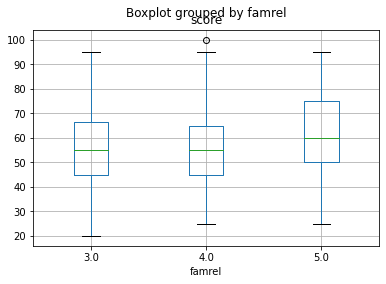

In [78]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'famrel')

In [79]:
# Remove the outlier for value 4:
stud_tmp = stud_tmp[~((stud_tmp.famrel == 4) & (stud_tmp.score == 100))]

In [80]:
# Check the dependence of the columns analytically:
print('Spearman p_value =',spearmanr(stud_tmp.famrel, stud_tmp.score)[1])
print('Pearson p_value =',pearsonr(stud_tmp.famrel, stud_tmp.score)[1])
print('Kendall p_value =',kendalltau(stud_tmp.famrel, stud_tmp.score)[1])

Spearman p_value = 0.09962723100070801
Pearson p_value = 0.12064589964900468
Kendall p_value = 0.10175344545604151


p_value > 0.05, there is no dependency between columns.

<AxesSubplot:title={'center':'score'}, xlabel='famrel'>

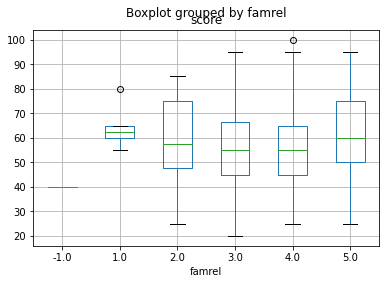

In [81]:
# Review the plot with data included scores = 1 and 2:
stud.boxplot(column = 'score', by = 'famrel')

The famrel column is not informative, remove it:

In [82]:
# Remove the column:
drop('famrel')

## 'freetime' column
The amount of free time remaining after the lessons at school (from 1 - very little to 5 - very much)

In [83]:
review_col_info(stud, 'freetime', True)

,freetime
3.0,132
4.0,102
2.0,59
5.0,35
1.0,16


Column freetime: found 5 unique values
Column freetime: found 8 null values


count    344.000000
mean       3.235465
std        1.004258
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [84]:
# Remove empty values, create a temporary dataset without these values:
stud_tmp = stud[~stud['freetime'].isnull()]

In [85]:
# Check the outliers:
outliers = get_outlier(stud_tmp, 'freetime')
print('Count of outliers: {}'.format(outliers.count()))
display(outliers)

Count of outliers: 16


7      1.0
19     1.0
68     1.0
89     1.0
95     1.0
106    1.0
111    1.0
112    1.0
189    1.0
238    1.0
260    1.0
276    1.0
293    1.0
301    1.0
315    1.0
378    1.0
Name: freetime, dtype: float64

In [86]:
# Remove the outliers:
stud_tmp = stud_tmp[stud_tmp.freetime > 1]

<AxesSubplot:title={'center':'score'}, xlabel='freetime'>

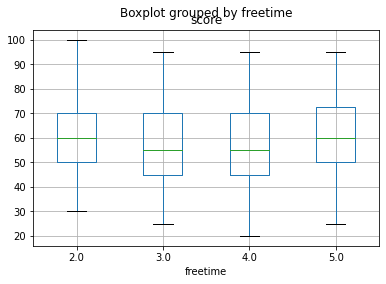

In [87]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'freetime')

There is no dependence on the plot.

In [88]:
# Check the dependence of the columns analytically:
print('Spearman p_value =',spearmanr(stud_tmp.freetime, stud_tmp.score)[1])

Spearman p_value = 0.42479412633666336


p_value > 0.05, there is no dependency between columns.

In [89]:
# Remove the column:
drop('freetime')

## 'goout' column
The amount of time spent with friends (from 1 - very little to 5 - very much).

In [90]:
review_col_info(stud, 'goout', True)

,goout
3.0,118
2.0,92
4.0,74
5.0,43
1.0,19


Column goout: found 5 unique values
Column goout: found 6 null values


count    346.000000
mean       3.086705
std        1.091998
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

In [91]:
# Remove empty values, create a temporary dataset without these values:
stud_tmp = stud[~stud['goout'].isnull()]

In [92]:
# Check the outliers:
outliers = get_outlier(stud_tmp, 'goout')
print('Count of outliers: {}'.format(outliers.count()))
display(outliers)

Count of outliers: 0


Series([], Name: goout, dtype: float64)

<AxesSubplot:title={'center':'score'}, xlabel='goout'>

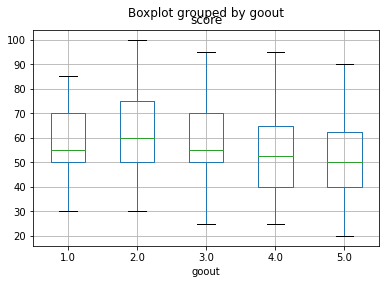

In [93]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'goout')

The plot shows a slight dependence: the more time spent with friends, the worse the scores. At the same time, without communicating with friends (value = 1), grades will be worse than if you communicate moderately (value = 2).

In [94]:
# Check the dependence of the columns analytically:
print('Spearman p_value =',spearmanr(stud_tmp.goout, stud_tmp.score)[1])

Spearman p_value = 0.0004028891842706913


Since p_value < 0.05, the null hypothesis is rejected and the alternative hypothesis that there is a relationship between the columns is accepted. There is also a slight correlation. The column should be included in the future model.

## 'health' column
Current health status (from 1 - very bad to 5 - very good).

In [95]:
review_col_info(stud, 'health', True)

,health
5.0,124
3.0,81
4.0,53
1.0,45
2.0,36


Column health: found 5 unique values
Column health: found 13 null values


count    339.000000
mean       3.516224
std        1.412812
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

In [96]:
# Remove empty values, create a temporary dataset without these values:
stud_tmp = stud[~stud['health'].isnull()]

In [97]:
# Check the outliers:
outliers = get_outlier(stud_tmp, 'health')
print('Count of outliers: {}'.format(outliers.count()))
display(outliers)

Count of outliers: 0


Series([], Name: health, dtype: float64)

<AxesSubplot:title={'center':'score'}, xlabel='health'>

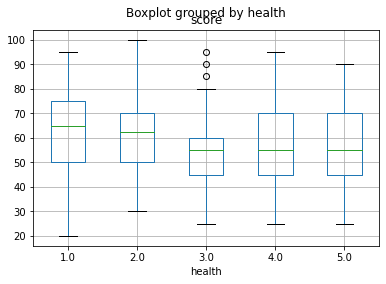

In [98]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'health')

In [99]:
# Remove outliers for health = 3:
stud_tmp = stud_tmp[~((stud_tmp.health == 3) & (stud_tmp.score > 82))]

<AxesSubplot:xlabel='health'>

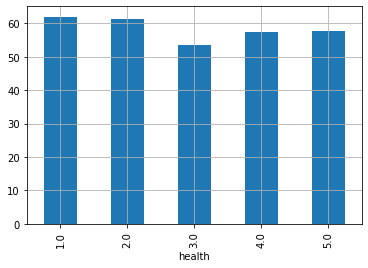

In [100]:
# Review the average scores for each health value:
stud_tmp.groupby(['health']).score.mean().plot(kind='bar', grid=True)

There is some dependency of scores from health. It can be seen that students with health value = 1 or 2 learn best, and those with health value = 3 learn the worst.

In [101]:
# Check the dependence of the columns analytically:
print('Spearman p_value =',spearmanr(stud_tmp.health, stud_tmp.score)[1])
# Correlation:
pd.DataFrame(stud_tmp.health, stud_tmp.score).reset_index().corr()

Spearman p_value = 0.425447522004362


,score,health
score,1.000000,-0.077457
health,-0.077457,1.000000


No dependencies were found. Let's try to distinguish two health groups: with health values = 3, 4, 5 and with values = 1, 2.

In [102]:
# Add a new column gr_health to the working dataset:
stud['gr_health'] = stud.health.apply(lambda x: 0 if x < 3 else 1)
# Remove empty values:
stud_tmp = stud[~stud['gr_health'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='gr_health'>

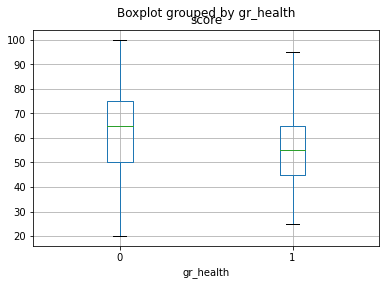

In [103]:
# Create a boxplotfr the new column:
stud_tmp.boxplot(column = 'score', by = 'gr_health')

The dependence of the columns is visible on the plot.

In [104]:
# Check the dependence of the columns analytically by Spearman:
print('Spearman p_value =',spearmanr(stud_tmp.gr_health, stud_tmp.score)[1])

Spearman p_value = 0.017547089432185626


Since p_value < 0.05, the null hypothesis is rejected and the alternative hypothesis that there is a relationship between the columns is accepted. There is also some correlation. The new gr_health column should be included in the future model. The  column health is less informative and it can be removed.

In [105]:
# Remove the column health:
drop('health')

## 'absences' column
Number of missed classes.

In [106]:
review_col_info(stud, 'absences', True, True)

,absences
0.0,74
2.0,60
4.0,52
6.0,30
8.0,20
10.0,17
14.0,12
12.0,12
16.0,7
3.0,7


Column absences: found 36 unique values
Column absences: found 10 null values


count    342.000000
mean       8.090643
std       24.704600
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

In [107]:
# Remove empty values, create a temporary dataset without these values:
stud_tmp = stud[~stud['absences'].isnull()]

In [108]:
# Check the outliers:
outliers = get_outlier(stud_tmp, 'absences')
print('Count of outliers: {}'.format(outliers.count()))
display(outliers)

Count of outliers: 27


40      25.0
74      54.0
89      18.0
103     26.0
118     20.0
123     18.0
183     56.0
198     24.0
203     18.0
205     28.0
216     22.0
222    385.0
234     18.0
237     20.0
260     21.0
276     75.0
277     22.0
280     30.0
281     19.0
304     20.0
307     38.0
309     18.0
311     20.0
313     22.0
315     40.0
320     23.0
390    212.0
Name: absences, dtype: float64

In [109]:
# Remove outliers:
stud_tmp = stud_tmp[~(stud_tmp.absences.isin(outliers.tolist()))]

<AxesSubplot:>

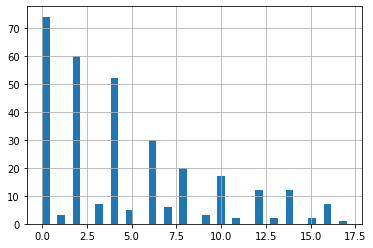

In [110]:
# Distribution histogram:
stud_tmp.absences.hist(bins=40)

Dependence between columns is visible, but quantitatively one values "fail" between others.

In [111]:
# Review the quantitative distribution of values:
pd.DataFrame(stud_tmp.absences.value_counts()).reset_index()

,index,absences
0,0.0,74
1,2.0,60
2,4.0,52
3,6.0,30
4,8.0,20
5,10.0,17
6,12.0,12
7,14.0,12
8,16.0,7
9,3.0,7


The table shows that there are much more even values than odd ones nearby. It is likely that students have double pairs, and the teacher most often marks each pair, i.e. every other lesson.<br>
Move the unfavorable odd gap values, add the new column dbl_absences to the dataset.

In [112]:
# Add dbl_absences column:
stud['dbl_absences'] = stud.absences.apply(lambda x: x+1 if x%2 == 1 else x)
stud[['dbl_absences', 'absences']]

,dbl_absences,absences
0,6.0,6.0
1,4.0,4.0
2,10.0,10.0
3,2.0,2.0
4,4.0,4.0
...,...,...
390,212.0,212.0
391,4.0,3.0
392,4.0,3.0
393,0.0,0.0


In [113]:
# Remove empty values:
stud_tmp = stud[~stud['dbl_absences'].isnull()]

# Check and remove outliers (except value = 18 because value = 17 is not outlier):
outliers = get_outlier(stud_tmp, 'dbl_absences')
outliers = outliers[outliers>18]
print('Count of outliers: {}'.format(outliers.count()))
display(outliers)
stud_tmp = stud_tmp[~(stud_tmp.dbl_absences.isin(outliers.tolist()))]

Count of outliers: 22


40      26.0
74      54.0
103     26.0
118     20.0
183     56.0
198     24.0
205     28.0
216     22.0
222    386.0
237     20.0
260     22.0
276     76.0
277     22.0
280     30.0
281     20.0
304     20.0
307     38.0
311     20.0
313     22.0
315     40.0
320     24.0
390    212.0
Name: dbl_absences, dtype: float64

<AxesSubplot:>

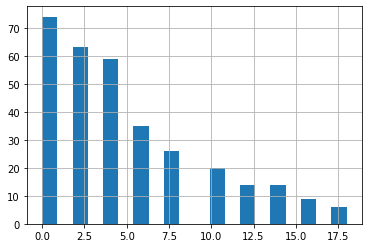

In [114]:
# Distribution histogram for new column:
stud_tmp.dbl_absences.hist(bins=20)

This is half the normal distribution.

<AxesSubplot:title={'center':'score'}, xlabel='dbl_absences'>

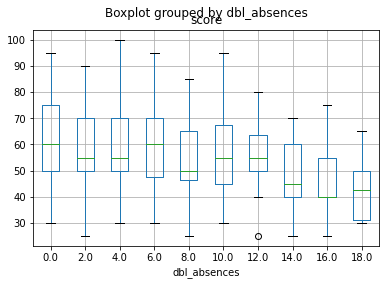

In [115]:
# Create a boxplot forthe new column:
stud_tmp.boxplot(column = 'score', by = 'dbl_absences')

In [116]:
# Remove the outlier for dbl_absences = 12:
stud_tmp = stud_tmp[~((stud_tmp.dbl_absences == 12) & (stud_tmp.score < 30))]

In [117]:
# Check the dependence of the columns analytically by Pearson:
print('Pearson p_value =',pearsonr(stud_tmp.age, stud_tmp.score)[1])

Pearson p_value = 0.011327936135542841


p_value < 0.05, which means that the dbl_absences column affects the scores. The updated dbl_absences column should be included in the future model and the absences column should be removed.

In [118]:
# Remove column absences:
drop('absences')

# Analysis of nominative columns

## 'school' column
Abbreviation of the school in which the student studies

In [119]:
review_col_info(stud, 'school')

,school
GP,311
MS,41


Column school: found 2 unique values
Column school: found 0 null values


<AxesSubplot:title={'center':'score'}, xlabel='school'>

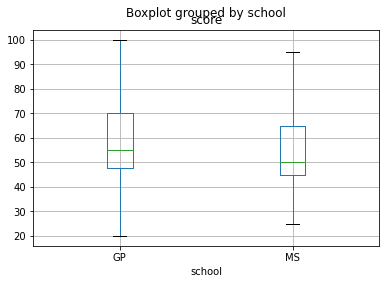

In [120]:
# Create a boxplot - dependence of scores on the school:
stud.boxplot(column = 'score', by = 'school')

It can be seen that the students from one school score on average higher than the students from another. However, it is necessary to test the dependence statistically by constructing a null hypothesis: the distribution of the two samples of scores for different schools does not differ. In both samples > 30 people, so the statistics can be checked. <br>
Check with two criteria: Student's (for normal distribution) and Mann-Whitney (for not normal). The check is done in two ways, because the distribution is conditionally normal.

In [121]:
# evaluation according to the Student criterion:
print(get_stat_dif(stud, 'school', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud, 'school', 'score', False))

For threshold 0.05 by Student's criterion no significance: min(p_value) = 0.14278913636690213
For threshold 0.05 by Mann-Whitney's criterion no significance: min(p_value) = 0.1353805466322333


p value > 0.05, therefore, the null hypothesis is not rejected, and there is no dependence between the columns.

In [122]:
# Remove the column:
drop('school')

## 'gender' column
Student gender ('F' - female, 'M' - male)

In [123]:
review_col_info(stud, 'gender')

,gender
F,182
M,170


Column gender: found 2 unique values
Column gender: found 0 null values


<AxesSubplot:title={'center':'score'}, xlabel='gender'>

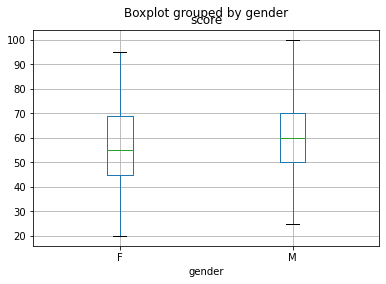

In [124]:
# Create a boxplot:
stud.boxplot(column = 'score', by = 'gender')

Check the dependence of the columns analytically.

In [125]:
# evaluation according to the Student criterion:
print(get_stat_dif(stud, 'gender', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud, 'gender', 'score', False))

For threshold 0.05 by Student's criterion no significance: min(p_value) = 0.05481629433224236
For threshold 0.05 by Mann-Whitney's criterion no significance: min(p_value) = 0.07998883274933247


p_value is slightly higher than 0.05, there is practically no dependence of scores on gender at this threshold value.

In [126]:
# Remove the column
drop('gender')

## 'address' column
Student address type ('U' - city, 'R' - outside the city).

In [127]:
review_col_info(stud, 'address')

,address
U,265
R,73


Column address: found 2 unique values
Column address: found 14 null values


In [128]:
# Remove empty values:
stud_tmp = stud[~stud['address'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='address'>

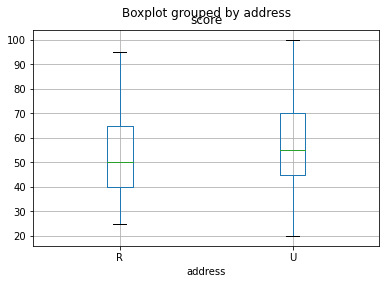

In [129]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'address')

The graph shows that students living in the city have higher average grades. Check this analytically.

In [130]:
# evaluation according to the Student criterion:
print(get_stat_dif(stud_tmp, 'address', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'address', 'score', False))

For threshold 0.05 by Student's criterion there is significance: for ('U', 'R') p_value = 0.010954630500627841
For threshold 0.05 by Mann-Whitney's criterion there is significance: for ('U', 'R') p_value = 0.011594499391942159


The dependence of scores on location was confirmed, the column should be included in a future model.

## 'famsize' column
Family size('LE3' <= 3, 'GT3' >3).

In [131]:
review_col_info(stud, 'famsize')

,famsize
GT3,228
LE3,100


Column famsize: found 2 unique values
Column famsize: found 24 null values


In [132]:
# Remove empty values:
stud_tmp = stud[~stud['famsize'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='famsize'>

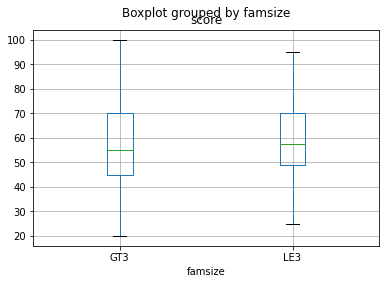

In [133]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'famsize')

According to the plot, the dependence is almost invisible. Check this analytically.

In [134]:
# evaluation according to the Student criterion:
print(get_stat_dif(stud_tmp, 'famsize', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'famsize', 'score', False))

For threshold 0.05 by Student's criterion no significance: min(p_value) = 0.6456316209263082
For threshold 0.05 by Mann-Whitney's criterion no significance: min(p_value) = 0.7319562219646617


There are no dependencies between columns.

In [135]:
# Remove the column:
drop('famsize')

## 'pstatus' column
Residence status of parentsr ('T' - living together 'A' - separated)

In [136]:
review_col_info(stud, 'pstatus')

,pstatus
T,277
A,34


Column pstatus: found 2 unique values
Column pstatus: found 41 null values


In [137]:
# Remove empty values:
stud_tmp = stud[~stud['pstatus'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='pstatus'>

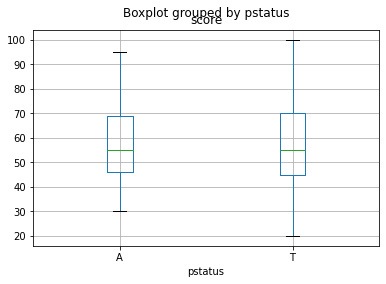

In [138]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'pstatus')

Visually, there is no dependence between the columns; for children whose parents are together, the spread of scores is wider. Check it analytically.

In [139]:
# evaluation according to the Student criterion:
print(get_stat_dif(stud_tmp, 'pstatus', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'pstatus', 'score', False))

For threshold 0.05 by Student's criterion no significance: min(p_value) = 0.761856873862071
For threshold 0.05 by Mann-Whitney's criterion no significance: min(p_value) = 0.9038144386442554


There are no dependencies between columns.

In [140]:
# Remove the column:
drop('pstatus')

## 'mprof' column
Mother's profession ('teacher' - teacher, 'health' - healthcare, 'services' - civil service, 'at_home' - not working, 'other' - other).

In [141]:
review_col_info(stud, 'mprof')

,mprof
other,115
services,90
teacher,51
at_home,49
health,30


Column mprof: found 5 unique values
Column mprof: found 17 null values


In [142]:
# Remove empty values:
stud_tmp = stud[~stud['mprof'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='mprof'>

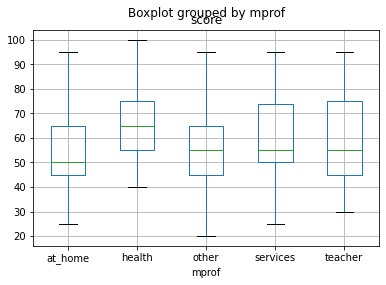

In [143]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'mprof')

The plot shows that the scores differ for different groups of students. Check it analytically.

In [144]:
# evaluation according to the Student criterion:
print(get_stat_dif(stud_tmp, 'mprof', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'mprof', 'score', False))

For threshold 0.005 by Student's criterion there is significance: for ('other', 'health') p_value = 0.0017949217915780725
For threshold 0.005 by Mann-Whitney's criterion there is significance: for ('other', 'health') p_value = 0.0032014312840457034


The mprof column has a very strong impact on scores, and should be included in the future model.

In [145]:
# Checking if there is a dependence of the mother's profession on her education:
stud_tmp = stud_tmp[stud_tmp.medu > 0]
# evaluation according to the Student criterion:
print(get_stat_dif(stud_tmp, 'mprof', 'medu', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'mprof', 'medu', False))

For threshold 0.005 by Student's criterion there is significance: for ('other', 'teacher') p_value = 6.55626831894457e-19
For threshold 0.005 by Mann-Whitney's criterion there is significance: for ('other', 'teacher') p_value = 4.801298912647178e-17


The dependence of medu and mprof columns is very high. But since the details are unknown, let's leave both columns in the model.

## 'fprof' column
Father's profession ('teacher' - teacher, 'health' - healthcare, 'services' - civil service, 'at_home' - not working, 'other' - other).

In [146]:
review_col_info(stud, 'fprof')

,fprof
other,176
services,89
teacher,26
health,15
at_home,14


Column fprof: found 5 unique values
Column fprof: found 32 null values


In [147]:
# Remove empty values:
stud_tmp = stud[~stud['fprof'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='fprof'>

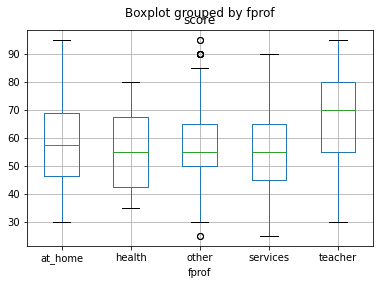

In [148]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'fprof')

There is a clear dependence only when the student's father is a teacher. In other cases, the average value of the estimates is approximately the same.

In [149]:
# Remove outliers for fprof = other:
stud_tmp = stud_tmp[~((stud_tmp.fprof == 'other') & ((stud_tmp.score > 89) | (stud_tmp.score < 30)))]

Check dependence analytically.

In [150]:
# evaluation according to the Student criterion:
print(get_stat_dif(stud_tmp, 'fprof', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'fprof', 'score', False))

For threshold 0.005 by Student's criterion there is significance: for ('other', 'teacher') p_value = 0.0001953244096575503
For threshold 0.005 by Mann-Whitney's criterion there is significance: for ('other', 'teacher') p_value = 0.00141317578148363


Visually, the dependence is confirmed only when the student's father is a teacher.

In [151]:
# Delete 'teacher' value and analyze the dependence analytically:
stud_tmp = stud_tmp[stud_tmp.fprof != 'teacher']
# evaluation according to the Student criterion:
print(get_stat_dif(stud_tmp, 'fprof', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'fprof', 'score', False))

For threshold 0.008333333333333333 by Student's criterion no significance: min(p_value) = 0.3043525075033831
For threshold 0.008333333333333333 by Mann-Whitney's criterion no significance: min(p_value) = 0.47424786444491807


For other professions, there is no dependence, which is confirmed by the graph. It turns out that it is not the father's profession that affects the student's grades, but whether the father is a teacher.
The number of teachers in the sample is < 30, the data will not be added into groups "Teacher"/"Not a teacher".

In [152]:
# Remove the column:
drop('fprof')

## 'reason' column
Reason for choosing a school ('home' - proximity to home, 'reputation' - reputation of the school, 'course' - educational program, 'other' - other).

In [153]:
review_col_info(stud, 'reason')

,reason
course,119
reputation,96
home,89
other,33


Column reason: found 4 unique values
Column reason: found 15 null values


In [154]:
# Remove empty values:
stud_tmp = stud[~stud['reason'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='reason'>

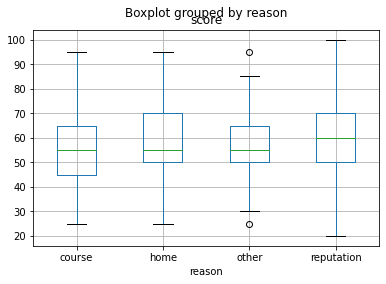

In [155]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'reason')

The plot shows a slight dependence of grades on the reputation of the school, otherwise the dependence is not visible.

In [156]:
# Remove the outliers:
stud_tmp = stud_tmp[~((stud_tmp.reason == 'other') & ((stud_tmp.score > 90) | (stud_tmp.score < 30)))]

In [157]:
# Check the dependence on scores analytically.
# evaluation according to the Student criterion:
print(get_stat_dif(stud_tmp, 'reason', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'reason', 'score', False))

For threshold 0.008333333333333333 by Student's criterion no significance: min(p_value) = 0.2532160066369303
For threshold 0.008333333333333333 by Mann-Whitney's criterion no significance: min(p_value) = 0.2152145461214583


There are no dependencies between columns.

In [158]:
# Remove the column:
drop('reason')

## 'custodian' column
Custodian of the student ('mother' - mother, 'father' - father, 'other' - other).

In [159]:
review_col_info(stud, 'custodian')

,custodian
mother,225
father,78
other,20


Column custodian: found 3 unique values
Column custodian: found 29 null values


In [160]:
# Remove empty values:
stud_tmp = stud[~stud['custodian'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='custodian'>

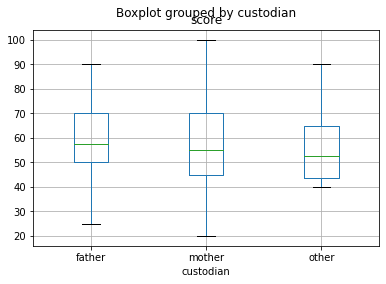

In [161]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'custodian')

The plot shows that the students who were brought up by fathers show the best scores, students who were brought up by mothers - slightly worse, and the worst scores were characteristic for the students who were raised by other people. However, there are less than 30 values in the other column, so the information is not entirely reliable. Check the dependence analytically.

In [162]:
# evaluation according to the Student criterion:
print(get_stat_dif(stud_tmp, 'custodian', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'custodian', 'score', False))

For threshold 0.016666666666666666 by Student's criterion no significance: min(p_value) = 0.2773071542197519
For threshold 0.016666666666666666 by Mann-Whitney's criterion no significance: min(p_value) = 0.19070779538210092


There is no dependency between columns.

In [163]:
# Remove the column:
drop('custodian')

## 'schoolsup' column
Additional educational support (yes or no).

In [164]:
review_col_info(stud, 'schoolsup')

,schoolsup
no,295
yes,48


Column schoolsup: found 2 unique values
Column schoolsup: found 9 null values


In [165]:
# Remove empty values:
stud_tmp = stud[~stud['schoolsup'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='schoolsup'>

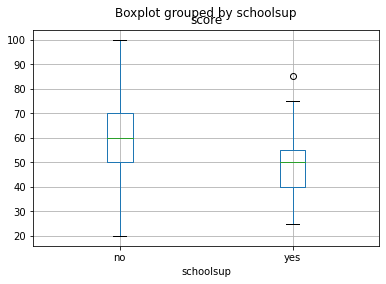

In [166]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'schoolsup')

In [167]:
# Remove the outlier for the value = yes:
stud_tmp = stud_tmp[~((stud_tmp.schoolsup == 'yes') & (stud_tmp.score > 80))]

The plot clearly shows that students with additional educational support have worse scores than students without it.
The data looks strange: on the contrary, scores should be higher for those who went to additional classes at school.
There is probably an error in the data and the scores values for yes and no are mixed up.
Or the school recommends attending additional classes for students with low scores, and then the dependence of the schoolsup column on the score appears, and not vice versa. Check the dependence analytically.

In [168]:
# evaluation according to the Student criterion: 
print(get_stat_dif(stud_tmp, 'schoolsup', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'schoolsup', 'score', False))

For threshold 0.05 by Student's criterion there is significance: for ('no', 'yes') p_value = 6.34088672972889e-07
For threshold 0.05 by Mann-Whitney's criterion there is significance: for ('no', 'yes') p_value = 1.1308356050291745e-06


There is a very strong dependence. The column is ambiguous, but there is not enough data to decide whether to remove it or not.
It is recommended to request additional information on the data before proceeding further in order to make a decision,
whether to leave the column.

## 'famsup' column
Family educational support (yes or no).

In [169]:
review_col_info(stud, 'famsup')

,famsup
yes,196
no,120


Column famsup: found 2 unique values
Column famsup: found 36 null values


In [170]:
# Remove empty values:
stud_tmp = stud[~stud['famsup'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='famsup'>

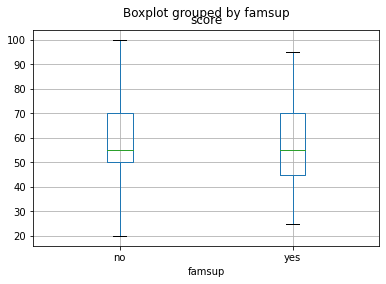

In [171]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'famsup')

The dependence is not visible on the graph. Check this analytically.

In [172]:
# evaluation according to the Student criterion: 
print(get_stat_dif(stud_tmp, 'famsup', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'famsup', 'score', False))

For threshold 0.05 by Student's criterion no significance: min(p_value) = 0.4063096650270416
For threshold 0.05 by Mann-Whitney's criterion no significance: min(p_value) = 0.4387297428041804


There is no dependency between columns.

In [173]:
# Remove the column:
drop('famsup')

## 'paid' column 
Additional paid math classes (yes or no).

In [174]:
review_col_info(stud, 'paid')

,paid
no,170
yes,146


Column paid: found 2 unique values
Column paid: found 36 null values


In [175]:
# Remove empty values:
stud_tmp = stud[~stud['paid'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='paid'>

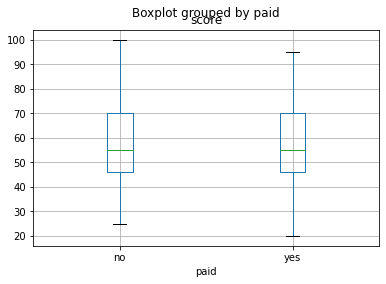

In [176]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'paid')

The data for both values for paid column looks exactly the same, the number of yes and no values is also comparable. There is no dependency between columns.

In [177]:
# Remove the column:
drop('paid')

## 'activities' column
Additional extracurricular activities (yes or no).

In [178]:
review_col_info(stud, 'activities')

,activities
yes,172
no,168


Column activities: found 2 unique values
Column activities: found 12 null values


In [179]:
# Remove empty values:
stud_tmp = stud[~stud['activities'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='activities'>

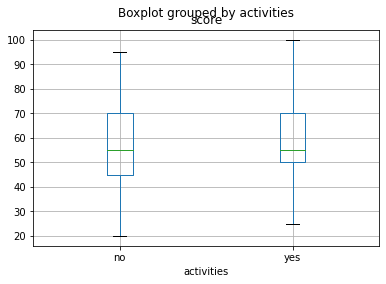

In [180]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'activities')

Visually, the plots are almost the same with almost the same number of yes and no values. There is no dependency between columns.

In [181]:
# Remove the column:
drop('activities')

## 'nursery' column
Attended kindergarten (yes or no).

In [182]:
review_col_info(stud, 'nursery')

,nursery
yes,272
no,68


Column nursery: found 2 unique values
Column nursery: found 12 null values


In [183]:
# Remove empty values:
stud_tmp = stud[~stud['nursery'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='nursery'>

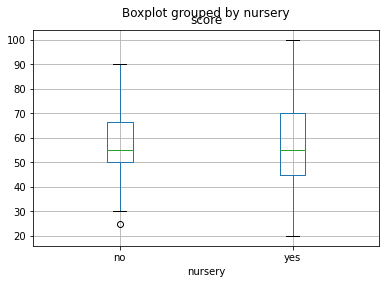

In [184]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'nursery')

In [185]:
# Remove outlier:
stud_tmp = stud_tmp[~((stud_tmp.nursery == 'no') & (stud_tmp.score < 29))]

In students who went to kindergarten, there is a greater spread in values. Check the dependence analytically.

In [186]:
# evaluation according to the Student criterion: 
print(get_stat_dif(stud_tmp, 'nursery', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'nursery', 'score', False))

For threshold 0.05 by Student's criterion no significance: min(p_value) = 0.7375634911982036
For threshold 0.05 by Mann-Whitney's criterion no significance: min(p_value) = 0.9409152140372561


There is no dependency between columns.

In [187]:
# Remove the column:
drop('nursery')

## 'higher' column
Wants to graduate (yes or no).

In [188]:
review_col_info(stud, 'higher')

,higher
yes,320
no,13


Column higher: found 2 unique values
Column higher: found 19 null values


In [189]:
# Remove empty values:
stud_tmp = stud[~stud['higher'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='higher'>

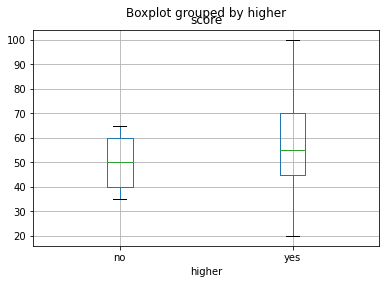

In [190]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'higher')

Based on the plot, students who want to graduate are doing better, and the range of scores is much higher. But the number of values = no is less than 30, so the tests can be unreliable.

In [191]:
# Remove the column:
drop('higher')

## 'internet' column
Internet access at home (yes or no).

In [192]:
review_col_info(stud, 'internet')

,internet
yes,274
no,49


Column internet: found 2 unique values
Column internet: found 29 null values


In [193]:
# Remove empty values:
stud_tmp = stud[~stud['internet'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='internet'>

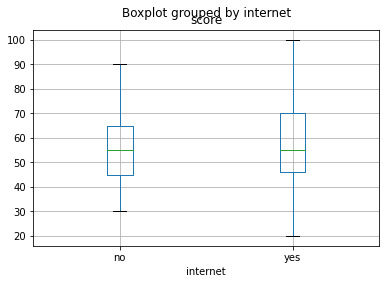

In [194]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'internet')

It can be seen from the plot that students with Internet access have slightly better scores, but the scope of the graphs is different, because the number of students using the Internet is much greater than those who do not use it. Check the dependence analytically.

In [195]:
# evaluation according to the Student criterion:  
print(get_stat_dif(stud_tmp, 'internet', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'internet', 'score', False))

For threshold 0.05 by Student's criterion no significance: min(p_value) = 0.22324450876431984
For threshold 0.05 by Mann-Whitney's criterion no significance: min(p_value) = 0.21794541295379688


There is no dependency between columns.

In [196]:
# Remove the column:
drop('internet')

## 'romantic' column
Has a romantic relationship (yes or no).

In [197]:
review_col_info(stud, 'romantic')

,romantic
no,219
yes,104


Column romantic: found 2 unique values
Column romantic: found 29 null values


In [198]:
# Remove empty values:
stud_tmp = stud[~stud['romantic'].isnull()]

<AxesSubplot:title={'center':'score'}, xlabel='romantic'>

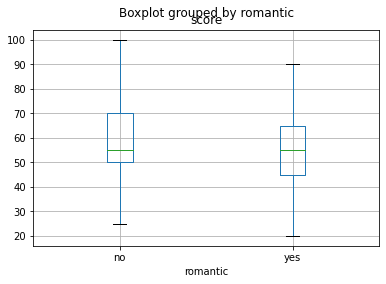

In [199]:
# Create a boxplot:
stud_tmp.boxplot(column = 'score', by = 'romantic')

The medians are the same for both graphs. But in general, the scores of students who have relationships are worse. Check the dependence analytically.

In [200]:
# evaluation according to the Student criterion:  
print(get_stat_dif(stud_tmp, 'romantic', 'score', True)) 
# evaluation according to the Mann-Whitney criterion:
print(get_stat_dif(stud_tmp, 'romantic', 'score', False))

For threshold 0.05 by Student's criterion no significance: min(p_value) = 0.2668414509361285
For threshold 0.05 by Mann-Whitney's criterion no significance: min(p_value) = 0.44391565568274016


There is no dependency between columns.

In [201]:
# Remove the column:
drop('romantic')

# Creating a model

In [202]:
# Remove columns from the dataset that do not affect student grades:
for col in drop_list:
    if col in stud.columns:
        stud = stud.drop(col, axis=1)

In [203]:
# The model is completed:
stud.head(10)

,age,address,medu,mprof,schoolsup,goout,score,gr_studytime,gr_failures,gr_health,dbl_absences
0,18,U,4.0,at_home,yes,4.0,30.0,0,0,1,6.0
1,17,U,1.0,at_home,no,3.0,30.0,0,0,1,4.0
2,15,U,1.0,at_home,yes,2.0,50.0,0,1,1,10.0
3,15,U,4.0,health,no,2.0,75.0,1,0,1,2.0
4,16,U,3.0,other,no,2.0,50.0,0,0,1,4.0
5,16,U,4.0,services,no,2.0,75.0,0,0,1,10.0
6,16,None,2.0,other,no,4.0,55.0,0,0,1,0.0
7,17,U,4.0,other,yes,4.0,30.0,0,0,0,6.0
8,15,U,3.0,services,no,2.0,95.0,0,0,0,0.0
9,15,U,3.0,other,no,1.0,75.0,0,0,1,0.0


# Creating of a single script for data processing

In [204]:
import pandas as pd


# Load data from the original dataset:
stud_model = pd.read_csv('stud_math.csv')

# Function to replace "" to None:
def replace_to_none(df, col):
    df[col] = df[col].apply(lambda x: None if (pd.isnull(x) or x.lower() == 'nan') else x)     
    
# Replace empty values to None in string variables:
str_col_list = ['school', 'gender', 'address', 'famsize', 'pstatus', 'mprof', 'fprof', 'reason', 'custodian', 'schoolsup', 
                'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for col in str_col_list:
    replace_to_none(stud_model, col)
    
# Group data, add new columns:
stud_model['gr_studytime'] = stud_model.studytime.apply(lambda x: 0 if x<3 else 1)
stud_model['gr_failures'] = stud_model.failures.apply(lambda x: 0 if x == 0 else 1)
stud_model['gr_health'] = stud_model.health.apply(lambda x: 0 if x < 3 else 1)
stud_model['dbl_absences'] = stud_model.absences.apply(lambda x: x+1 if x%2 == 1 else x)
                                                       
# Remove non-informative columns:
stud_model = stud_model[['age', 'address', 'medu', 'fedu', 'schoolsup', 'goout', 'score', 
                         'gr_studytime', 'gr_failures', 'gr_health', 'dbl_absences']]
         
# The model is completed:
stud_model.head(10)

,age,address,medu,fedu,schoolsup,goout,score,gr_studytime,gr_failures,gr_health,dbl_absences
0,18,U,4.0,4.0,yes,4.0,30.0,0,0,1,6.0
1,17,U,1.0,1.0,no,3.0,30.0,0,0,1,4.0
2,15,U,1.0,1.0,yes,2.0,50.0,0,1,1,10.0
3,15,U,4.0,2.0,no,2.0,75.0,1,0,1,2.0
4,16,U,3.0,3.0,no,2.0,50.0,0,0,1,4.0
5,16,U,4.0,3.0,no,2.0,75.0,0,0,1,10.0
6,16,None,2.0,2.0,no,4.0,55.0,0,0,1,0.0
7,17,U,4.0,4.0,yes,4.0,30.0,0,0,0,6.0
8,15,U,3.0,2.0,no,2.0,95.0,0,0,0,0.0
9,15,U,3.0,4.0,no,1.0,75.0,0,0,1,0.0
